### Portfolio assignment 13
10 min: Do a bivariate analysis on the penguins dataset for the following combination of columns:
- species VS sex
- island VS sex

For this bivariate analysis, at least perform the following tasks:
- Do you expect their to be a correlation between the two columns?
- Create a contingency table. Do you observe different ratios between categories here?
- Create a bar plot for this contingency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?

In [1]:
import seaborn as sns
penguins = sns.load_dataset("penguins")

In [2]:
# Species vs Sex
# Verwachte corrolatie: Ik denk dat er niet zo sterk een correlatie zal zijn tussen de twee. 
# Het geslacht is 50/50, dus ik denk niet dat dat gekoppeld is aan de soort.

In [3]:
def create_contingency_table(dataset, column1, column2):
    return dataset.groupby([column1, column2]).size().unstack(column1, fill_value=0)

In [4]:
penguinsContingencyTable = create_contingency_table(penguins, 'species','sex')

In [6]:
# Er zijn wel verschillende ratio's aanwezig.
# Voor Adelie is er duidelijk een hogere correlatie tussen mannen en vrouwen, terwijl dat bij Chinstrap juist lager is. 
penguinsContingencyTable.head()

species,Adelie,Chinstrap,Gentoo
sex,,,
Female,73,34,58
Male,73,34,61


<AxesSubplot:xlabel='sex'>

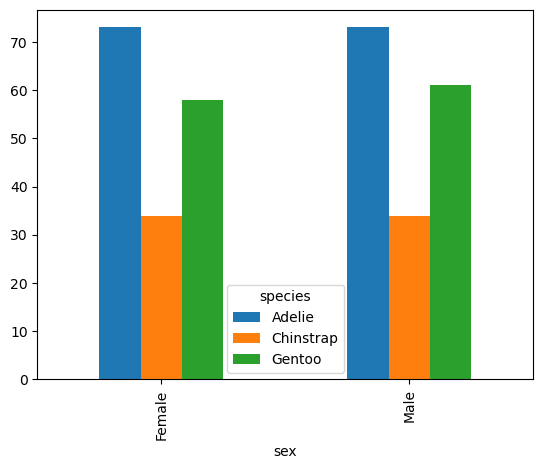

In [7]:
# De ratio's van Adelie en Chinstrap zijn gelijk voor man en vrouw. 
# De Gentoo heeft een hoger ratio bij mannen in vergelijking met vrouwen. 
penguinsContingencyTable.plot(kind='bar')

In [8]:
from scipy.stats import chi2_contingency
def check_cat_vs_cat_correlation(dataset, column1, column2):
    contingency_table = create_contingency_table(dataset, column1, column2)
    chi2 = chi2_contingency(contingency_table)
    p_value = chi2[1]
    odds_of_correlation = 1 - p_value
    print(f"The odds of a correlation between {column1} and {column2} is {odds_of_correlation * 100}% (Based on a p value of {p_value}).")
    print("This percentage needs to be at least 95% for a significant correlation.")

In [9]:
# De berekening geeft aan dat de kans op een correlatie 2.4% is. Dit moet op z'n minst 95% zijn voor een significante correlatie.
# Hier is dus geen sprake van een duidelijke correlatie. 
check_cat_vs_cat_correlation(penguins, 'species','sex')

The odds of a correlation between species and sex is 2.4010631023415385% (Based on a p value of 0.9759893689765846).
This percentage needs to be at least 95% for a significant correlation.


In [10]:
# Island vs Sex
# Verwachte corrolatie: Eventueel is er een correlatie, omdat soorten waarschijnlijk het liefst bij elkaar op een eiland verblijven.

In [11]:
penguinsContingencyTable = create_contingency_table(penguins, 'species','island')

In [12]:
# Er is wel een soort correlatie aanwezig. Het is namelijk vrij duidelijk dat er op Torgersen alleen penguins van het soort Adelie verblijven. 
# Ook zie je dat Gentoo alleen maar op Biscoe zit en Chinstrap alleen op Dream. 
penguinsContingencyTable.head()

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,124
Dream,56,68,0
Torgersen,52,0,0


<AxesSubplot:xlabel='island'>

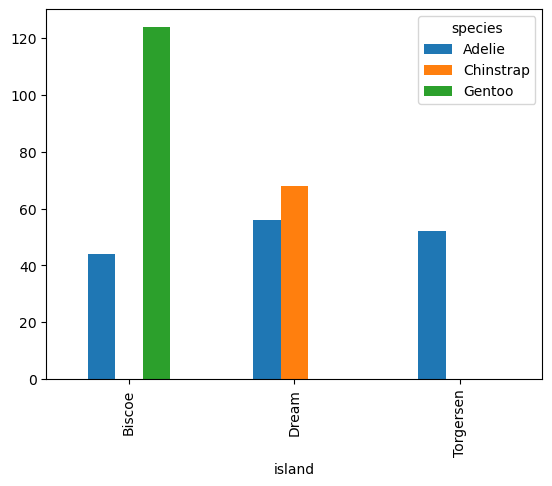

In [13]:
# Hier is duidelijk te zien dat Adelie verdeeld zit over de drie eilanden. 
# De overige soorten zitten allen bij elkaar op een eiland. 
penguinsContingencyTable.plot(kind='bar')

In [14]:
# Uit deze berekening blijkt ook dat er een significante correlatie is tussen de soort en het eiland. 
check_cat_vs_cat_correlation(penguins, 'species','island')

The odds of a correlation between species and island is 100.0% (Based on a p value of 1.3545738297192517e-63).
This percentage needs to be at least 95% for a significant correlation.
